In [1]:
import numpy as np
import pandas as pd
import openpyxl 
import os

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


In [2]:
ccp = pd.read_excel('../CCP/final_data/all_in_one.xlsx', sheet_name='all_in_one')
ccp.head()

,CCP,quarter,clearning service,4.1.1,4.1.2,4.1.3,4.1.4,4.1.5,4.1.6,4.1.7,...,6.2.15.POST,18.1.1.1,18.1.1.2,18.1.2.2,19.1.1,19.1.2,23.1.2.OTC,23.1.2.ETD,23.2.1.OTC,23.2.1.ETD
0,KELER,Q2-2017,TEA,6.949029e+05,16188.040276,NaN,6.293910e+06,6.293910e+06,0.0,0.0,...,5.149808e+07,11.0,10.0,0.0,NaN,17.0,0.0,7.419962e+06,0.0,3.684394e+07
1,KELER,Q2-2017,KGA,7.488794e+05,16188.040276,NaN,6.782789e+06,6.782789e+06,0.0,0.0,...,7.216904e+07,8.0,4.0,0.0,1160.0,8.0,0.0,2.895278e+04,0.0,3.152465e+07
2,KELER,Q2-2017,TP KGA,3.588365e+05,16188.040276,NaN,3.250072e+06,3.250072e+06,0.0,0.0,...,1.760907e+07,0.0,35.0,0.0,NaN,0.0,0.0,0.000000e+00,0.0,0.000000e+00
3,KELER,Q2-2017,CEEGEX KGA,8.865016e+04,16188.040276,NaN,8.029268e+05,8.029268e+05,0.0,0.0,...,6.261182e+06,0.0,19.0,0.0,NaN,0.0,0.0,0.000000e+00,0.0,0.000000e+00
4,KELER,Q3-2016,TEA,1.119162e+06,16173.378619,2.264273e+06,1.118551e+07,1.118551e+07,0.0,0.0,...,4.685747e+07,11.0,12.0,0.0,NaN,17.0,NaN,NaN,NaN,NaN


In [13]:
#MISSING DATA PRESENTATION
total = ccp.isnull().sum().sort_values(ascending=False)
ratio = (ccp.isnull().sum() / ccp.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, ratio], axis=1, keys=['Total', 'Ratio'])
missing.head(20)

,Total,Ratio
4.1.3,140,0.412979
19.1.1,133,0.392330
4.1.2,120,0.353982
4.1.6,120,0.353982
23.1.2.ETD,96,0.283186
23.1.2.OTC,90,0.265487
4.1.10,90,0.265487
23.2.1.OTC,82,0.241888
23.2.1.ETD,77,0.227139
18.1.2.2,72,0.212389


Text(0.5, 1.0, 'Percent missing data by feature')

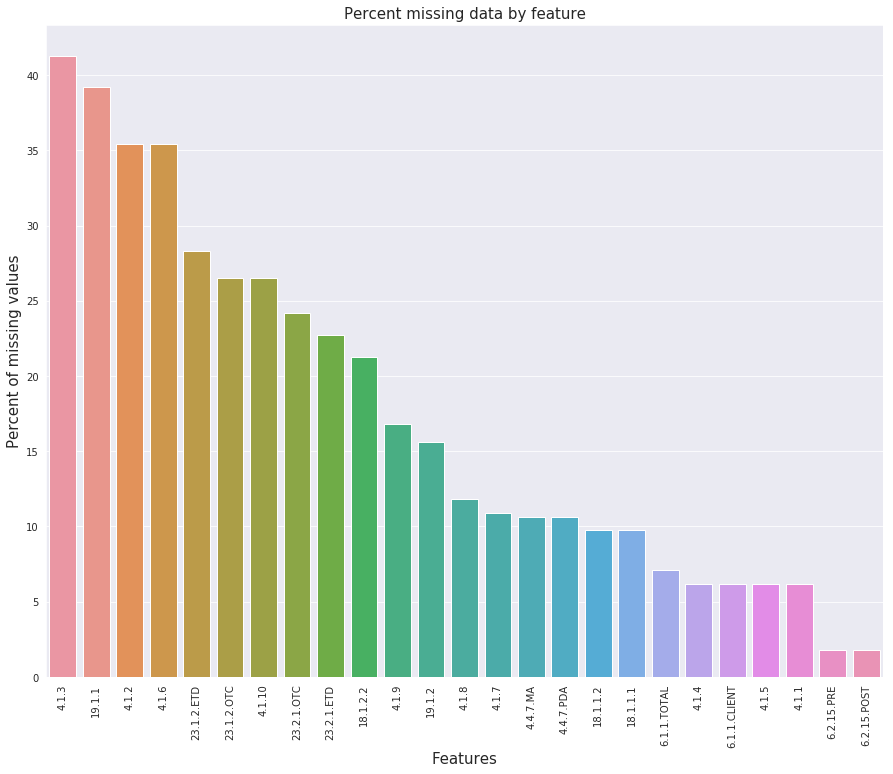

In [14]:
all_data_na = (ccp.isnull().sum() / len(ccp)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [16]:
ccp.dtypes

CCP                   object
quarter               object
clearning service     object
4.1.1                float64
4.1.2                float64
4.1.3                float64
4.1.4                float64
4.1.5                float64
4.1.6                float64
4.1.7                float64
4.1.8                float64
4.1.9                float64
4.1.10               float64
4.4.7.PDA            float64
4.4.7.MA             float64
6.1.1.CLIENT         float64
6.1.1.TOTAL          float64
6.2.15.PRE           float64
6.2.15.POST          float64
18.1.1.1             float64
18.1.1.2             float64
18.1.2.2             float64
19.1.1               float64
19.1.2               float64
23.1.2.OTC           float64
23.1.2.ETD           float64
23.2.1.OTC           float64
23.2.1.ETD           float64
dtype: object

In [17]:
ccp.describe()

,4.1.1,4.1.2,4.1.3,4.1.4,4.1.5,4.1.6,4.1.7,4.1.8,4.1.9,4.1.10,...,6.2.15.POST,18.1.1.1,18.1.1.2,18.1.2.2,19.1.1,19.1.2,23.1.2.OTC,23.1.2.ETD,23.2.1.OTC,23.2.1.ETD
count,3.180000e+02,2.190000e+02,1.990000e+02,3.180000e+02,3.180000e+02,2.190000e+02,3.020000e+02,2.990000e+02,2.820000e+02,2.490000e+02,...,3.330000e+02,306.000000,306.000000,267.000000,206.000000,286.000000,2.490000e+02,2.430000e+02,2.570000e+02,2.620000e+02
mean,1.251140e+07,2.549641e+06,2.271619e+06,6.994649e+08,7.340057e+08,3.303041e+06,2.556722e+07,7.354280e+08,8.503889e+08,2.096410e+07,...,2.799113e+10,18.297386,25.062092,0.198502,3899.058252,28.835664,3.928346e+10,4.398644e+09,3.021998e+12,2.086252e+10
std,2.739689e+07,9.435546e+06,5.802034e+06,1.257086e+09,1.326368e+09,1.118125e+07,1.158104e+08,1.410868e+09,1.679242e+09,7.287132e+07,...,4.837529e+10,20.876996,32.613676,0.563553,13663.618258,46.398475,2.948042e+11,1.702619e+10,2.368372e+13,1.007038e+11
min,6.020000e+02,0.000000e+00,0.000000e+00,1.771255e+05,1.771255e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.771255e+05,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.707820e+05,0.000000e+00,0.000000e+00,1.257075e+07,1.257075e+07,0.000000e+00,0.000000e+00,1.613526e+07,1.444571e+07,0.000000e+00,...,6.036468e+07,4.000000,1.000000,0.000000,3.250000,4.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.941895e+06,0.000000e+00,0.000000e+00,9.775000e+07,1.089350e+08,0.000000e+00,0.000000e+00,1.340000e+08,1.348500e+08,0.000000e+00,...,1.945862e+09,11.000000,14.000000,0.000000,40.500000,12.000000,0.000000e+00,2.627217e+06,0.000000e+00,1.903922e+08
75%,1.076024e+07,0.000000e+00,1.897773e+06,9.224625e+08,9.224550e+08,0.000000e+00,3.329562e+06,8.197639e+08,8.862842e+08,0.000000e+00,...,2.594688e+10,22.000000,29.750000,0.000000,264.750000,33.000000,0.000000e+00,1.287202e+09,3.797514e+08,2.955340e+09
max,1.500000e+08,4.272505e+07,4.905913e+07,5.839893e+09,5.839893e+09,6.528010e+07,7.000000e+08,6.603284e+09,7.618337e+09,3.841500e+08,...,1.624964e+11,87.000000,154.000000,2.000000,77355.000000,225.000000,2.781279e+12,1.104689e+11,1.970147e+14,8.476543e+11


In [18]:
ccp['quarter'].value_counts()

Q2-2018    37
Q2-2017    37
Q3-2017    37
Q4-2017    37
Q1-2018    37
Q1-2017    36
Q4-2016    36
Q3-2016    32
Q2-2016    24
Q1-2016    21
Q4-2015     5
Name: quarter, dtype: int64

In [20]:
ccp.columns

Index(['CCP', 'quarter', 'clearning service', '4.1.1', '4.1.2', '4.1.3',
       '4.1.4', '4.1.5', '4.1.6', '4.1.7', '4.1.8', '4.1.9', '4.1.10',
       '4.4.7.PDA', '4.4.7.MA', '6.1.1.CLIENT', '6.1.1.TOTAL', '6.2.15.PRE',
       '6.2.15.POST', '18.1.1.1', '18.1.1.2', '18.1.2.2', '19.1.1', '19.1.2',
       '23.1.2.OTC', '23.1.2.ETD', '23.2.1.OTC', '23.2.1.ETD'],
      dtype='object')

In [9]:
ccpa = pd.read_excel('../CCP/final_data/aio_aggr_sorted.xlsx', sheet_name='aio_aggr_sorted')
ccpa[ccpa['quarter'] == 'Q4-2015']


,CCP,quarter,4.1.1,4.1.2,4.1.3,4.1.4,4.1.5,4.1.6,4.1.7,4.1.8,...,18.1.1.2,18.1.2.2,19.1.1,19.1.2,23.1.2.OTC,23.1.2.ETD,23.2.1.OTC,23.2.1.ETD,year,q
127,Eurex,Q4-2015,50000000.0,0.0,0.0,3.809168e+09,4.361769e+09,0,700000000.0,0.0,...,143,0,526,186,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015,4
128,Euro-ccp,Q4-2015,2769512.0,0.0,0.0,2.440739e+08,2.623807e+08,0,0.0,244073947.0,...,23,2,33,2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015,4
129,Nasdaq,Q4-2015,19610370.0,0.0,21820330.0,3.608360e+08,4.086111e+08,73098109,37794506.0,292290328.0,...,0,0,4031,56,1.112804e+10,3.530045e+09,2.551958e+11,1.358085e+10,2015,4


In [11]:
ccpa.shape

(130, 29)

In [12]:
ccpa = ccpa.drop([127, 128,129])
ccpa.shape

(127, 29)

In [13]:
ccpa['CCP'].value_counts()

Nasdaq                   10
CCP AUSTRIA              10
LCHLTD                   10
ICE CLEAR NETHERLANDS    10
Euro-ccp                 10
Kdpw                     10
Eurex                    10
OMI CLEAR                10
BME CLEARING              9
KELER                     9
LCHSA                     9
ICE CLEAR EUROPE          8
CCG                       7
LME                       5
Name: CCP, dtype: int64

In [14]:
ccpa['quarter'].value_counts()

Q3-2017    14
Q2-2017    14
Q4-2017    14
Q2-2018    14
Q1-2018    14
Q4-2016    13
Q1-2017    13
Q3-2016    12
Q2-2016    10
Q1-2016     9
Name: quarter, dtype: int64

In [15]:
ccpa[ccpa['quarter'] == 'Q1-2017']['CCP']

70             BME CLEARING
71                      CCG
72              CCP AUSTRIA
73                    Eurex
74                 Euro-ccp
75         ICE CLEAR EUROPE
76    ICE CLEAR NETHERLANDS
77                    KELER
78                     Kdpw
79                   LCHLTD
80                    LCHSA
81                   Nasdaq
82                OMI CLEAR
Name: CCP, dtype: object

In [16]:
ccpa[ccpa['CCP'] == 'LME']['quarter']

11    Q2-2018
25    Q1-2018
39    Q4-2017
53    Q3-2017
67    Q2-2017
Name: quarter, dtype: object